In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv('simulaciones.csv')#, nrows=5000000)

ParserError: Error tokenizing data. C error: Expected 12 fields in line 21164644, saw 18


In [61]:
print(data.shape)
data.tail()

(5000000, 12)


,Identificador,Numero_agentes,Tipo_red,Agente,Ronda,Estado,Puntaje,Politica,Parametro-0,Parametro-1,Politica_lag,Consistencia
4999995,503,1000,Full,366,195,0,0,4,1000,1,4.0,1.0
4999996,503,1000,Full,366,196,1,-1,4,1000,1,4.0,1.0
4999997,503,1000,Full,366,197,0,0,4,1000,1,4.0,1.0
4999998,503,1000,Full,366,198,1,-1,4,1000,1,4.0,1.0
4999999,503,1000,Full,366,199,0,0,4,1000,1,4.0,1.0


In [62]:
data_full = data.query('Tipo_red=="Full"').copy()

In [63]:
data_full.Numero_agentes.unique()

array([   5,    6,   10,   11,  101, 1000])

$$ 1 - 2*\sqrt{\frac{\sum_{r}(Asistencia_{r} - 0.5)^2}{R}}$$

In [99]:
aux = data.groupby(['Numero_agentes', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Numero_agentes',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/aux['Numero_agentes']
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
aux.head()

,Numero_agentes,Identificador,Ronda,Asistencia_total,Asistencia,diferencia_con_umbral
0,5,0,0,2,0.4,0.01
1,5,0,1,3,0.6,0.01
2,5,0,2,1,0.2,0.09
3,5,0,3,0,0.0,0.25
4,5,0,4,0,0.0,0.25


In [115]:
df = aux.groupby(['Numero_agentes', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/300
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])


df.head()

,Numero_agentes,Identificador,diferencia_con_umbral,Asistencia_optima
0,5,0,74.36,0.004276
1,5,1,3.00,0.800000
2,5,2,74.60,0.002670
3,5,3,74.52,0.003205
4,5,4,74.20,0.005348


In [116]:
df['Asistencia_optima'].describe()

count    504.000000
mean       0.293673
std        0.373003
min        0.000000
25%        0.003896
50%        0.006421
75%        0.724961
max        1.000000
Name: Asistencia_optima, dtype: float64

In [76]:
aux['Asistencia_optima'].describe()

count    151200.000000
mean          0.296765
std           0.378435
min           0.000000
25%           0.000000
50%           0.000000
75%           0.727273
max           1.000000
Name: Asistencia_optima, dtype: float64

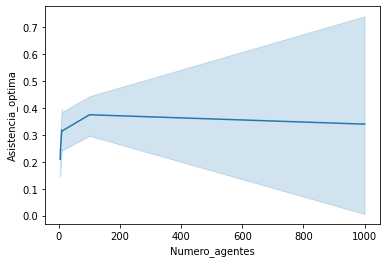

In [117]:
sns.lineplot(x=df['Numero_agentes'], y=df['Asistencia_optima'])